PRGM 4

In [21]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
    
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7120 - accuracy: 0.8224 - val_loss: 0.3817 - val_accuracy: 0.8992
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3669 - accuracy: 0.8978 - val_loss: 0.3151 - val_accuracy: 0.9114
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3153 - accuracy: 0.9120 - val_loss: 0.2820 - val_accuracy: 0.9196
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2844 - accuracy: 0.9204 - val_loss: 0.2589 - val_accuracy: 0.9276
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2428 - accuracy: 0.9334
Test accuracy: 0.9333999752998352


-----------

PRGM 5

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [4]:
texts = [
    "free money",
    "hello friend",
    "money lottery",
    "friend hello"
]

In [6]:
labels = [1, 0, 1, 0]
count_vect = CountVectorizer()

In [8]:
X_counts = count_vect.fit_transform(texts)
print(X_counts)
print(count_vect.get_feature_names_out())
clf = MultinomialNB()
clf.fit(X_counts, labels)
test_texts = [
    "money lottery",
    "hello dear"
]

  (0, 0)	1
  (0, 4)	1
  (1, 2)	1
  (1, 1)	1
  (2, 4)	1
  (2, 3)	1
  (3, 2)	1
  (3, 1)	1
['free' 'friend' 'hello' 'lottery' 'money']


In [10]:
X_test_counts = count_vect.transform(test_texts)
predicted = clf.predict(X_test_counts)
print(predicted) 
accuracy = accuracy_score(labels, clf.predict(X_counts))
print(f'Accuracy: {accuracy:.2f}')

[1 0]
Accuracy: 1.00


------------------------------------------------------------------------------------------------------------------------------

PRGM 6

In [2]:
#!pip install pgmpy

  Using cached pgmpy-0.1.25-py3-none-any.whl.metadata (6.4 kB)
  Using cached torch-2.3.1-cp311-cp311-win_amd64.whl.metadata (26 kB)
  Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.2 kB)
  Using cached tbb-2021.13.0-py3-none-win_amd64.whl.metadata (1.1 kB)
Using cached pgmpy-0.1.25-py3-none-any.whl (2.0 MB)
Using cached torch-2.3.1-cp311-cp311-win_amd64.whl (159.8 MB)
Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl (228.5 MB)
Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl (3.5 MB)
Using cached tbb-2021.13.0-py3-none-win_amd64.whl (286 kB)


In [1]:
# !pip install pgmpy

import pandas as pd
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination

data = pd.read_csv("D:\Machine  Learning\Heart_ds_Bayesian_Belief_Network.csv")
heart_disease = pd.DataFrame(data)
print(heart_disease)

model = BayesianModel([
    ('age', 'Lifestyle'),
    ('Gender', 'Lifestyle'),
    ('Family', 'heartdisease'),
    ('diet', 'cholestrol'),
    ('Lifestyle', 'diet'),
    ('cholestrol', 'heartdisease'),
    ('diet', 'cholestrol') 
])

model.fit(heart_disease, estimator=MaximumLikelihoodEstimator)

HeartDisease_infer = VariableElimination(model)

print('For Gender enter Male:0, Female:1')
print('For Family History enter Yes:1, No:0')
print('For Diet enter High:0, Medium:1')
print('for LifeStyle enter Athlete:0, Active:1, Moderate:2, Sedentary:3')
print('for Cholesterol enter High:0, BorderLine:1, Normal:2') 

q = HeartDisease_infer.query(variables=['heartdisease'], evidence={
    'age': int(input('Enter Age: ')),
    'Gender': int(input('Enter Gender: ')), 
    'Family': int(input('Enter Family History: ')),
    'diet': int(input('Enter Diet: ')),
    'Lifestyle': int(input('Enter Lifestyle: ')),
    'cholestrol': int(input('Enter Cholestrol: '))
})

print(q)

    age  Gender  Family  diet  Lifestyle  cholestrol  heartdisease
0    20       0       1     1          3           0             1
1    10       1       1     1          3           0             1
2    30       0       0     0          2           1             1
3    40       0       1     1          3           2             0
4    30       1       1     0          0           2             0
5    20       0       1     1          1           0             1
6    40       0       1     0          2           0             1
7    10       0       1     1          3           0             1
8    30       1       1     0          0           2             0
9    10       1       0     0          0           2             1
10   40       1       0     1          2           0             1
11   40       0       1     1          3           2             0
12   20       1       0     0          0           0             0
13   20       0       1     1          1           0          

Enter Age:  30
Enter Gender:  1
Enter Family History:  0
Enter Diet:  1
Enter Lifestyle:  0
Enter Cholestrol:  1


+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.0000 |
+-----------------+---------------------+
| heartdisease(1) |              1.0000 |
+-----------------+---------------------+


---------------

PRGM 7

In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

In [24]:
data_points = np.array([1,4,2,6,8,3]).reshape(-1,1)
num_clusters = 2

In [26]:
kmeans = KMeans(n_clusters=num_clusters,random_state=42)
kmean_labels = kmeans.fit_predict(data_points)
print(kmean_labels)

[0 0 0 1 1 0]


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
cluster_centers = kmeans.cluster_centers_
print(f'Cluster Center : {cluster_centers}')

Cluster Center : [[2.5]
 [7. ]]


In [30]:
data = pd.DataFrame(data_points, columns= ['Values'])
data['kmeans_cluster'] = kmean_labels
silhouette_kmeans = silhouette_score(data_points,kmean_labels)
print(f'Silhouette Score for k-means : {silhouette_kmeans}')

Silhouette Score for k-means : 0.5774891774891775


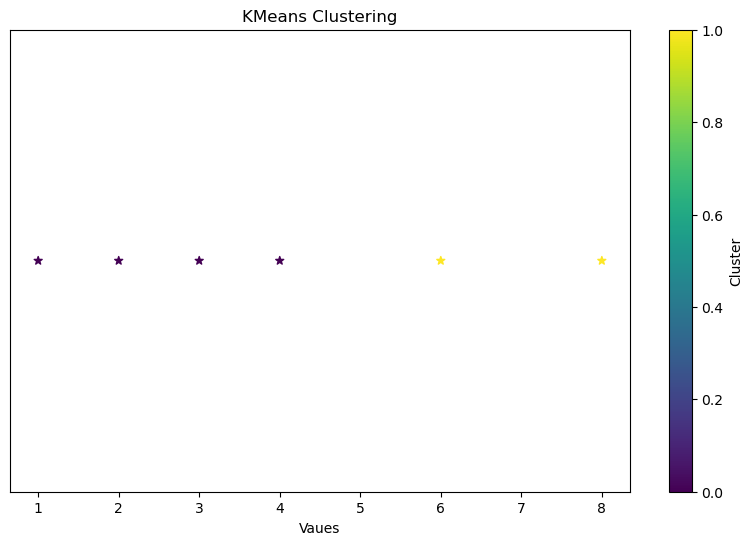

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(data_points,np.zeros_like(data_points),c = kmean_labels,cmap='viridis', marker= '*')
plt.title('KMeans Clustering') 
plt.xlabel('Vaues')
plt.yticks([])
plt.colorbar(label = 'Cluster')
plt.show()

In [34]:
gmm = GaussianMixture(n_components=num_clusters,random_state=42)
gmm_labels = gmm.fit_predict(data_points)
print(gmm_labels)

[0 0 0 1 1 0]


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [36]:
datas = pd.DataFrame(data_points, columns= ['Values'])
datas['gmm_cluster'] = gmm_labels
silhouette_gmm = silhouette_score(data_points,gmm_labels)
print(f'Silhouette Score for GMM : {silhouette_gmm}')

Silhouette Score for GMM : 0.5774891774891775


In [38]:
clusters_centers = gmm.means_
print(f'Cluster Center : {clusters_centers}')

Cluster Center : [[2.51608809]
 [6.98418975]]


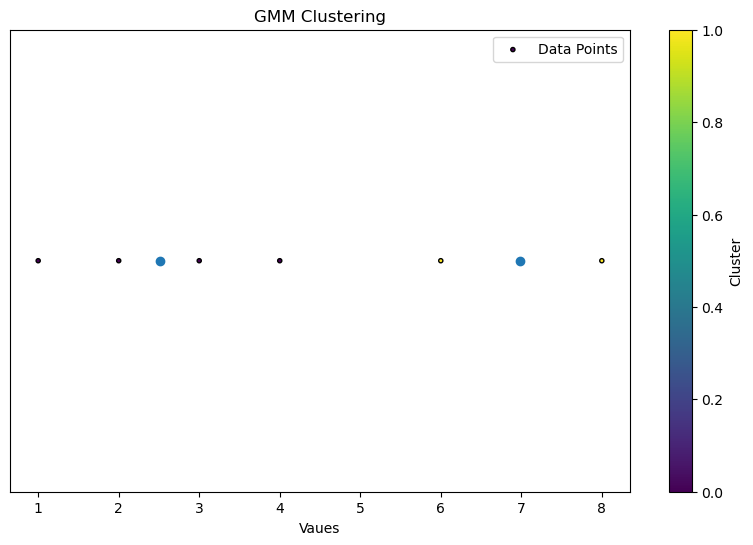

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(data_points,np.zeros_like(data_points),c = gmm_labels,cmap='viridis', marker= '.',edgecolors='k',label = 'Data Points')
plt.scatter(clusters_centers,np.zeros_like(clusters_centers))
plt.title('GMM Clustering')
plt.xlabel('Vaues')
plt.yticks([])
plt.legend()
plt.colorbar(label = 'Cluster')
plt.show()

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


k-Means Labels: [2 0 2 2 0 0 2 2 0 2 0 0 2 0 0 0 0 2 0 0 2 0 2 0 0 2 0 2 0 0 0 2 2 0 2 0 2
 0 0 2 2 2 0 0 0 0 0 2 2 0 2 0 0 2 2 2 0 0 2 2 0 0 0 0 2 2 2 2 2 0 2 2 2 2
 0 2 2 0 2 0 0 2 2 0 0 0 2 2 0 2 2 2 0 0 0 0 2 2 2 0 0 0 0 0 0 2 2 2 2 2 0
 2 2 1 0 2 2 0 2 2 2 0 2 0 2 2 0 0 2 0 0 2 0 2 0 2 0 0 2 0 2 2 0 2 2 2 0 0
 2 2 2 2 0 2 2 0 2 2 0 2 0 2 2 0 2 2 2 2 0 0 0 0 2 2 2 2 2 2 0 1 2 0 0 2 0
 2 2 2 0 0 0 2 2 0 2 2 0 2 2 0 2 2 2 2 0 0 2 2 2 1 2 2 2 2 0 2 0 0 0 2 2 0
 2 0 0 2 2 0 0 2 0 2 2 0 2 2 0 2 0 2 0 0 2 2 0 0 0 0 2 2 0 2 2 2 0 0 2 0 2
 2 0 2 0 0 0 0 2 0 0 2 2 0 2 2 0 2 2 0 2 0 2 2 2 0 2 0 0 2 2 0 0 0 0 2 2 0
 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 

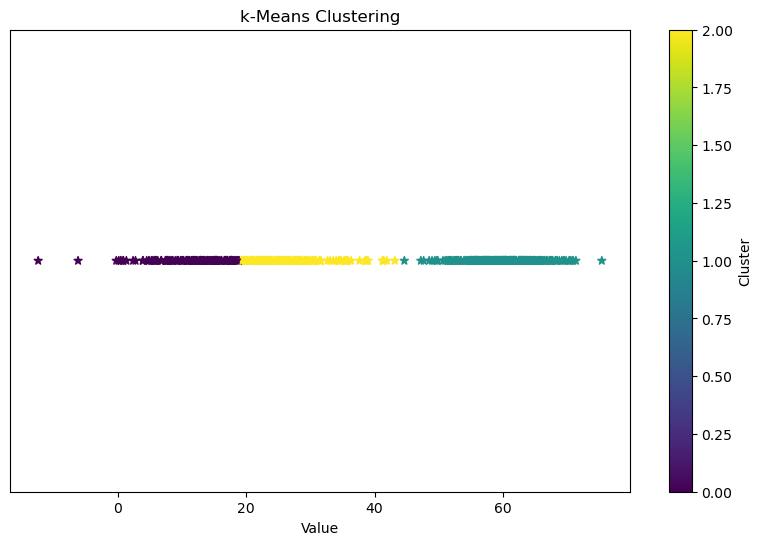

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for GMM: 0.6967
GMM Cluster Centers: [[12.88543979]
 [59.81240478]
 [25.13938747]]


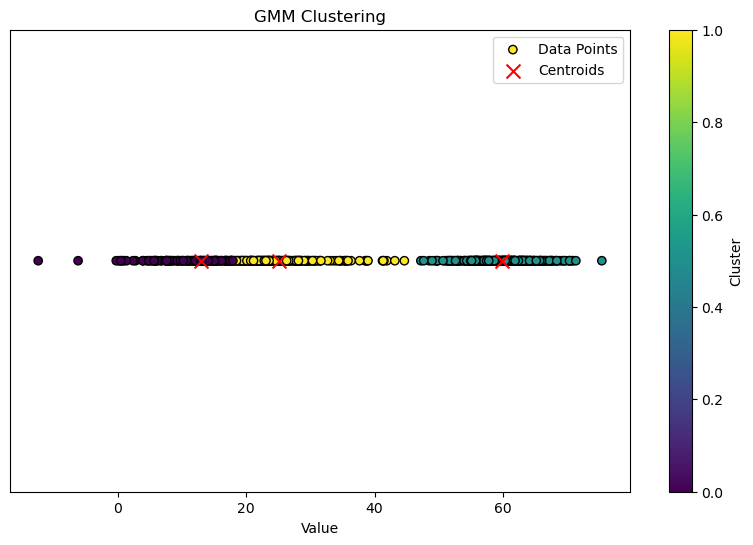

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

np.random.seed(42)

# Define new parameters for two normal distributions
mean1, std1, size1 = 20, 10, 300
mean2, std2, size2 = 60, 5, 300

# Generate data points for two distributions
data_points_set1 = np.random.normal(loc=mean1, scale=std1, size=size1)
data_points_set2 = np.random.normal(loc=mean2, scale=std2, size=size2)

data_points = np.concatenate([data_points_set1, data_points_set2]).reshape(-1, 1)

num_clusters = 3

# k-Means Clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(data_points)
print(f'k-Means Labels: {kmeans_labels}')
cluster_centers = kmeans.cluster_centers_
print(f'k-Means Cluster Centers: {cluster_centers}')

data = pd.DataFrame(data_points, columns=['Value'])
data['kmeans_cluster'] = kmeans_labels

silhouette_kmeans = silhouette_score(data_points, kmeans_labels)
print(f'Silhouette Score for k-Means: {silhouette_kmeans:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(data_points, np.zeros_like(data_points), c=kmeans_labels, cmap='viridis', marker='*')
plt.title('k-Means Clustering')
plt.xlabel('Value')
plt.yticks([])
plt.colorbar(label='Cluster')
plt.show()

# Gaussian Mixture Model (GMM) Clustering
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm_labels = gmm.fit_predict(data_points)

data['gmm_cluster'] = gmm_labels

silhouette_gmm = silhouette_score(data_points, gmm_labels)
print(f'Silhouette Score for GMM: {silhouette_gmm:.4f}')

cluster_centers = gmm.means_
print(f'GMM Cluster Centers: {cluster_centers}')

plt.figure(figsize=(10, 6))
plt.scatter(data_points, np.zeros_like(data_points), c=gmm_labels, cmap='viridis', marker='o', edgecolor='k', label='Data Points')
plt.scatter(cluster_centers, np.zeros_like(cluster_centers), c='red', marker='x', s=100, label='Centroids')
plt.title('GMM Clustering')
plt.xlabel('Value')
plt.yticks([]) 
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

-----------------------------

PRGM 8

In [46]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [48]:
iris = load_iris()
X, y = iris.data, iris.target


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [52]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [54]:
print("\nPredictions (Format: True Label -> Predicted Label):\n")
for true_label, predicted_label, sample in zip(y_test, y_pred, X_test):
    result = "Correct" if true_label == predicted_label else "Wrong"
    print(f"{true_label} -> {predicted_label} : {result} (Sample: {sample})")


Predictions (Format: True Label -> Predicted Label):

1 -> 1 : Correct (Sample: [6.1 2.8 4.7 1.2])
0 -> 0 : Correct (Sample: [5.7 3.8 1.7 0.3])
2 -> 2 : Correct (Sample: [7.7 2.6 6.9 2.3])
1 -> 1 : Correct (Sample: [6.  2.9 4.5 1.5])
1 -> 1 : Correct (Sample: [6.8 2.8 4.8 1.4])
0 -> 0 : Correct (Sample: [5.4 3.4 1.5 0.4])
1 -> 1 : Correct (Sample: [5.6 2.9 3.6 1.3])
2 -> 2 : Correct (Sample: [6.9 3.1 5.1 2.3])
1 -> 1 : Correct (Sample: [6.2 2.2 4.5 1.5])
1 -> 1 : Correct (Sample: [5.8 2.7 3.9 1.2])
2 -> 2 : Correct (Sample: [6.5 3.2 5.1 2. ])
0 -> 0 : Correct (Sample: [4.8 3.  1.4 0.1])
0 -> 0 : Correct (Sample: [5.5 3.5 1.3 0.2])
0 -> 0 : Correct (Sample: [4.9 3.1 1.5 0.1])
0 -> 0 : Correct (Sample: [5.1 3.8 1.5 0.3])
1 -> 1 : Correct (Sample: [6.3 3.3 4.7 1.6])
2 -> 2 : Correct (Sample: [6.5 3.  5.8 2.2])
1 -> 1 : Correct (Sample: [5.6 2.5 3.9 1.1])
1 -> 1 : Correct (Sample: [5.7 2.8 4.5 1.3])
2 -> 2 : Correct (Sample: [6.4 2.8 5.6 2.2])
0 -> 0 : Correct (Sample: [4.7 3.2 1.6 0.2])


-----------------------------------

PRGM 9

C:\Users\asus\AppData\Local\Temp\ipykernel_2080\2784942908.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = x_query_b[i, :].dot(theta_best)


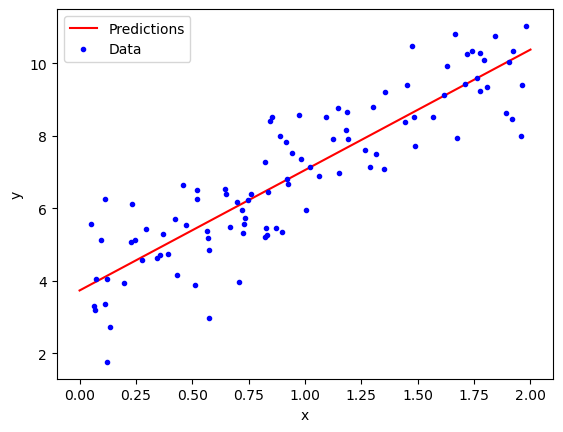

In [58]:
import numpy as np
import matplotlib.pyplot as plt
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

def locally_weighted_regression(x_query, x, y, tau):
    m = x.shape[0]
    x_b = np.c_[np.ones((m, 1)), x] 
    x_query_b = np.c_[np.ones((x_query.shape[0], 1)), x_query]
    y_pred = np.zeros(x_query.shape[0])
    
    for i in range(x_query.shape[0]):
        weights = np.exp(-np.sum((x_b - x_query_b[i, :])*2, axis=1) / (2 * tau*2))
        W = np.diag(weights)
        theta_best = np.linalg.inv(x_b.T.dot(W).dot(x_b)).dot(x_b.T).dot(W).dot(y)
        y_pred[i] = x_query_b[i, :].dot(theta_best)
    
    return y_pred
x_new = np.array([[0], [2]])
tau = 0.5
y_predict = locally_weighted_regression(x_new, x, y, tau)
plt.plot(x_new, y_predict, 'r-', label="Predictions")
plt.plot(x, y, "b.", label="Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

-------------

PRGM 10

In [62]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


In [64]:
iris = datasets.load_iris()
x = iris['data'][:,(2, 3)]
y = (iris['target'] == 2).astype(np.float64)
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])
svm_clf.fit(x, y)
print(svm_clf.predict([[5.5,1.7]]))

[1.]


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


---------